# AULA 3
### CADERNO DE ANÁLISE EXPLORATÓRIA DE DADOS DO DATASUS (ATENDIMENTO)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
from matplotlib import cm

### Code abaixo para voltar ao ponto que paramos na aula 2

In [2]:
dados = pd.read_csv("csvs\\datasus_local_internacao_atendimento.csv", encoding = "utf-8", skiprows = 3, sep = ";", 
                    skipfooter = 10, engine = 'python', decimal=",")
colunas_usaveis = dados.mean().index.tolist()
colunas_usaveis.insert(0, "Unidade da Federação")
usaveis = dados[colunas_usaveis]
usaveis = usaveis.set_index("Unidade da Federação")
usaveis = usaveis.drop("Total", axis = 1)
pd.options.display.float_format = "{:.2f}".format 

Podemos selecionar um número n de rows aleatórias do dataframe usando df.sample(n=?). Para repetir o resultado, será necessário gerar e salvar uma seed.

In [3]:
np.random.seed(687942)
usaveis.sample(n=7)

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,...,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,
32 Espírito Santo,57408.11,284224.80,1152115.25,2296383.23,5724199.54,16212109.41,10032886.43,12262049.08,12453466.98,11789786.09,...,29709557.40,26236636.40,25163041.42,27533550.66,26542802.84,26555688.68,23735724.64,28614683.75,27450865.16,27460475.47
31 Minas Gerais,971394.37,2861781.50,10018011.35,21730281.63,43429517.54,205912743.65,70301089.50,79119005.51,79046322.41,79268070.12,...,166133803.32,152106660.17,152398599.06,158097903.98,141323175.61,147078556.29,126330649.86,136867275.75,135977571.87,120467187.34
24 Rio Grande do Norte,134605.36,272088.08,684678.30,1695824.89,4730811.68,11763899.23,9110108.87,10126626.54,10964234.85,11032871.23,...,23085765.53,20350167.95,20135895.21,22201116.15,20512979.08,20936692.02,17319947.66,19916570.52,20219961.81,19593057.45
17 Tocantins,4113.76,76633.06,343702.61,1068685.94,3022200.87,5136474.61,5051932.07,5200151.87,5343714.73,5344487.99,...,7587986.90,7594175.34,7573064.95,7225320.39,7341171.88,7025821.12,6204453.42,6732370.56,5018138.13,4489665.87
53 Distrito Federal,191951.47,769966.25,2165619.56,3813256.48,7121965.42,10561085.46,10215956.80,11627918.26,11922015.36,11900817.00,...,21333585.20,19617400.92,19207148.01,20429067.27,18219172.96,19405446.88,18123899.78,21437430.22,23479773.03,22233542.26
50 Mato Grosso do Sul,199556.12,573675.41,1069816.66,1995899.52,4277979.14,8301006.10,8279288.79,9793888.78,8997542.75,9842108.59,...,18812185.96,18316480.80,17844511.04,18653296.92,17769247.00,17357008.80,15652772.51,16703851.10,15838659.34,12508717.35
16 Amapá,33672.74,104822.98,118378.28,226661.18,844019.90,1329876.61,1275063.72,1177745.93,1396371.51,1411520.77,...,2540183.86,2239443.36,2141400.83,2349858.56,2342499.95,2286241.46,1774558.12,2701014.87,2699492.23,2155083.37


### DESAFIO 1: Escolher uma palete de cores mais adequada do matplotlib.

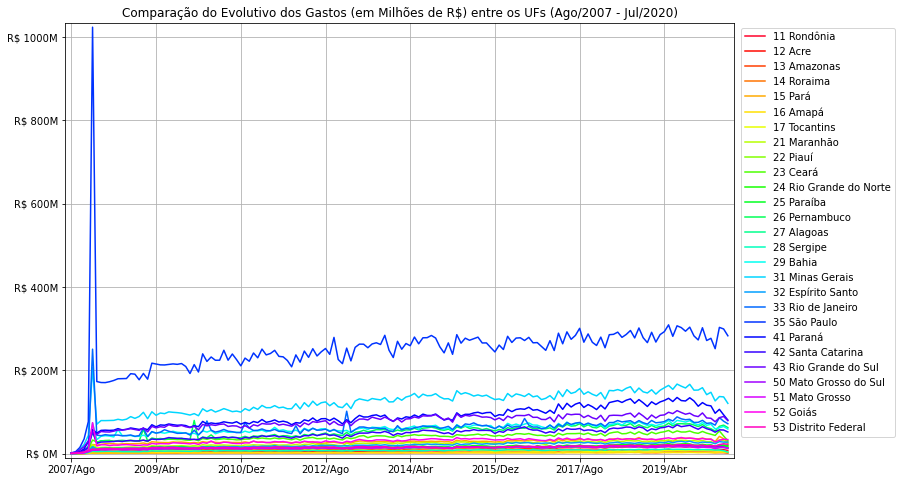

In [4]:
cmap = cm.get_cmap('gist_rainbow')

ax = usaveis.T.plot(figsize=(12,8), cmap=cmap)
ufs = usaveis.index.tolist()
ufs = [uf[3:] for uf in ufs]

# Para Y axis
def millions(x, pos):
    return f'R$ {int(x/1000000)}M'
formattery = ticker.FuncFormatter(millions)
ax.yaxis.set_major_formatter(formattery)

ax.legend(bbox_to_anchor = (1.002, 1), loc="upper left")
ax.margins(0.01)
plt.title("Comparação do Evolutivo dos Gastos (em Milhões de R$) entre os UFs (Ago/2007 - Jul/2020)")
plt.grid()

### DESAFIO 02: Adicionar uma coluna mostrando a região (Norte, Nodeste, Sul, Suldeste e Centro-Oeste) de cada estado.

In [5]:
UFS = usaveis.index.tolist()
codigos = [uf[0:2] for uf in UFS]
regioes = []

for i in range(len(codigos)):
    if codigos[i][0] == '1':
        regioes.append("Norte")
    if codigos[i][0] == '2':
        regioes.append("Nordeste")
    if codigos[i][0] == '3':
        regioes.append("Sudeste")
    if codigos[i][0] == '4':
        regioes.append("Sul")
    if codigos[i][0] == '5':
        regioes.append("Centro-Oeste")

usaveis.insert(loc=0, column="Região", value=regioes)

Adicionando novamente a coluna Total para ordenar o df:

In [6]:
usaveis["Total"] = usaveis.sum(axis=1)

In [7]:
usaveis

,Região,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,...,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,Total
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,Norte,4209.37,16397.03,133645.19,346912.84,711758.31,1829559.71,1940792.63,1955721.68,2143353.81,...,8948605.66,8660753.05,8326416.32,8413784.42,7174312.31,7423678.64,8581195.13,9193593.76,7407388.24,925572673.82
12 Acre,Norte,10470.07,14001.71,86200.85,301323.68,769612.36,1731744.62,1743978.66,2057439.02,2057829.69,...,3174249.43,2959569.09,3261123.88,2981264.22,2859102.06,2472063.08,2383895.48,2199920.70,1163813.08,420666755.81
13 Amazonas,Norte,35752.72,45570.64,416012.30,2020381.79,5949408.99,11419210.08,7934652.10,8641517.13,8531576.49,...,14781332.42,14923380.22,15939561.23,15138110.70,14773739.41,16330913.81,19441150.53,17509334.66,13358514.02,1766925554.09
14 Roraima,Norte,4785.91,11858.63,43852.67,369328.51,470676.43,808448.39,771687.83,876091.18,896952.53,...,3121104.71,2889969.87,3084561.08,2967159.04,2813954.05,2304961.42,2910776.44,3216466.51,2739498.41,303485991.45
15 Pará,Norte,181159.29,433414.74,1893197.50,5105406.44,13162823.43,21762104.16,20126081.01,22149375.82,23436682.75,...,35555518.00,35222625.80,37009819.17,34635702.52,34749098.46,28714969.96,41248502.78,35396030.78,27618727.51,4425537480.57
16 Amapá,Norte,33672.74,104822.98,118378.28,226661.18,844019.90,1329876.61,1275063.72,1177745.93,1396371.51,...,2239443.36,2141400.83,2349858.56,2342499.95,2286241.46,1774558.12,2701014.87,2699492.23,2155083.37,290781699.72
17 Tocantins,Norte,4113.76,76633.06,343702.61,1068685.94,3022200.87,5136474.61,5051932.07,5200151.87,5343714.73,...,7594175.34,7573064.95,7225320.39,7341171.88,7025821.12,6204453.42,6732370.56,5018138.13,4489665.87,997507241.35
21 Maranhão,Nordeste,385330.18,1018352.93,2277717.78,4334468.23,8832514.85,21551600.33,13452263.93,14750895.33,15148647.11,...,30849081.57,29632234.87,31256187.80,28457299.99,28832662.46,23938156.77,32979447.97,31128144.66,24374205.15,3621885105.60
22 Piauí,Nordeste,220788.25,353468.67,1078182.68,2406035.32,4929772.93,11375419.37,9711680.20,10428191.09,10227943.00,...,17649092.71,16846903.02,17312889.65,16264613.57,15318975.43,11878587.16,14175053.45,15375523.59,18019214.49,2122676207.29


In [8]:
usaveis_ord_total = usaveis.sort_values("Total", ascending = False)
usaveis_ord_total = usaveis_ord_total.drop("Total", axis = 1)
usaveis = usaveis.drop("Total", axis = 1)

In [9]:
usaveis_ord_total.head(10)

,Região,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,...,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,
35 São Paulo,Sudeste,1665349.90,4434168.64,14577395.84,35032259.98,76668547.41,1023564534.21,172834914.73,170481849.56,170278285.95,...,303382527.10,282391773.21,272697695.04,301991167.67,271356784.04,276606288.92,251696362.66,302857660.98,299060851.62,282709570.31
31 Minas Gerais,Sudeste,971394.37,2861781.50,10018011.35,21730281.63,43429517.54,205912743.65,70301089.50,79119005.51,79046322.41,...,166133803.32,152106660.17,152398599.06,158097903.98,141323175.61,147078556.29,126330649.86,136867275.75,135977571.87,120467187.34
41 Paraná,Sul,554800.22,1431708.01,4630402.44,11120030.79,28790722.87,58081334.45,48855046.46,55611791.07,56115135.82,...,133847978.48,126209369.22,113545318.91,122268754.10,116061602.52,114476997.52,96727112.19,106103737.62,92901461.36,80320852.69
43 Rio Grande do Sul,Sul,1049252.33,3182913.14,8571312.11,16592432.80,30134255.70,51064610.03,45897704.82,52928695.92,51972416.77,...,96913904.71,90971809.22,88720873.59,97474362.62,85451646.35,84651396.59,76294596.96,86076113.42,89019478.82,78929703.81
33 Rio de Janeiro,Sudeste,469469.34,921646.57,2994664.57,7250528.08,13627123.27,250564959.99,44122593.19,42892665.52,45295962.86,...,82247728.87,74620476.61,74895861.63,79705663.75,72412810.42,73594497.93,68160773.35,86281033.16,77604925.21,71540227.33
29 Bahia,Nordeste,135146.36,448349.75,1382038.11,3348779.62,11948984.56,73336297.08,33410124.06,41301703.40,42826993.62,...,78987864.57,72314938.33,68576836.10,74373631.19,67697544.36,70340301.29,59109689.20,61756775.71,65159300.63,58898100.40
26 Pernambuco,Nordeste,400640.85,1088340.42,2973553.48,6699828.82,16919031.39,51219113.60,26222079.10,30716361.81,30589332.79,...,71448833.23,68402767.80,64856891.24,69630712.14,62552189.96,59628674.07,53843729.23,65424719.40,68145110.59,62325444.34
42 Santa Catarina,Sul,693955.05,1092964.12,3562300.82,7578502.38,14772555.10,53034384.67,24409572.92,27483480.50,27806641.44,...,67767419.13,62635827.71,58210191.51,64546099.76,59549208.75,56709962.09,51179993.45,56843604.33,56503747.99,51764534.76
23 Ceará,Nordeste,357904.65,572356.18,1865065.71,5131814.39,10798042.86,32444328.54,27643304.86,30085370.22,31376221.00,...,53941867.57,50213511.70,48447583.61,53086389.30,49015303.22,46395356.97,43468816.62,54200339.48,42146555.81,30809221.22


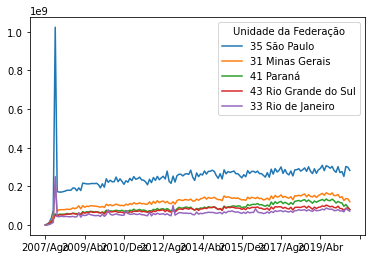

In [10]:
usaveis_ord_total[usaveis_ord_total.columns[1:]].head(5).T.plot()

### DESAFIO 03: Formatar o gráfico de custos por mês dos 5 estados, deixando ele agradável
### DESAFIO 04:  Adicione o seu estado aos 5 estados plotados anteriormente

Para resolver o desafio, plotei dois ax na mesma figura:
No primeiro, utilizei o próprio pandas para plotar o top5, selecionando apenas os meses entre Fev/2008 e Jun/2020.
Para o segundo, utilizei o matplotlib. Meu estado já estava no top5, então escolhi o estado com o menor gasto em saúde para uma comparação.

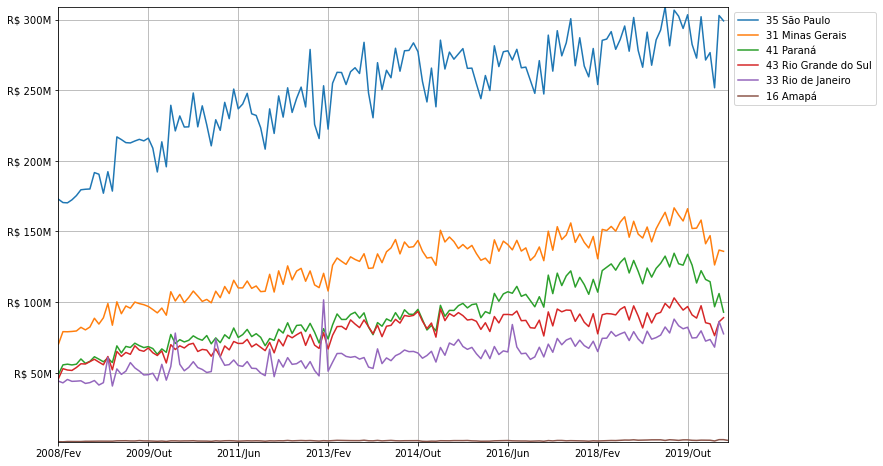

In [11]:
estado = "16 Amapá"
ax = usaveis_ord_total[usaveis_ord_total.columns[1:]].loc[:,'2008/Fev': '2020/Jun'].head(5).T.plot(figsize=(12,8))
ax.plot(usaveis_ord_total.loc[estado,"2008/Fev":"2020/Jul"], label = estado)

# Para Y axis
formattery = ticker.FuncFormatter(millions)
ax.yaxis.set_major_formatter(formattery)

plt.grid()
plt.margins(0.0)

ax.legend(bbox_to_anchor = (1.002, 1), loc="upper left")

### DESAFIO 05: Buscar os casos de dengue no Brasil (época de maior número de casos e regiões mais atingidas) e se os picos de alguns estados em fevereiro e verão de modo geral, pode ser reflexos dos casos de dengue.

### DESAFIO 06: Plotar o gráfico dos custos apenas dos estados da região sudeste e verificar se os picos de 2013/Fev teve comportamento similar em todos os demais estados da região

Como bem apontado pelo professor, entre os anos de 2012 e 2013 houve uma das maiores crises de dengue do Brasil, com cerca de 2 milhões de casos notificados no ano de 2013 segundo o site do [Médicos Sem Fronteiras](https://www.msf.org.br/o-que-fazemos/atividades-medicas/dengue). 

Tentei achar dados em tabelas ou .csv sobre as doenças durante esses anos mas não consegui nada além de notícias e [databases mais atuais](https://info.dengue.mat.br/).

In [12]:
#Para selecionar apenas os UFs do Sudeste, usarei a coluna criada no primeiro desafio da aula criando um serie booleana

is_sudeste = usaveis["Região"] == "Sudeste"
usaveis_sudeste = usaveis[is_sudeste]
usaveis_sudeste

,Região,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,...,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,
31 Minas Gerais,Sudeste,971394.37,2861781.50,10018011.35,21730281.63,43429517.54,205912743.65,70301089.50,79119005.51,79046322.41,...,166133803.32,152106660.17,152398599.06,158097903.98,141323175.61,147078556.29,126330649.86,136867275.75,135977571.87,120467187.34
32 Espírito Santo,Sudeste,57408.11,284224.80,1152115.25,2296383.23,5724199.54,16212109.41,10032886.43,12262049.08,12453466.98,...,29709557.40,26236636.40,25163041.42,27533550.66,26542802.84,26555688.68,23735724.64,28614683.75,27450865.16,27460475.47
33 Rio de Janeiro,Sudeste,469469.34,921646.57,2994664.57,7250528.08,13627123.27,250564959.99,44122593.19,42892665.52,45295962.86,...,82247728.87,74620476.61,74895861.63,79705663.75,72412810.42,73594497.93,68160773.35,86281033.16,77604925.21,71540227.33
35 São Paulo,Sudeste,1665349.90,4434168.64,14577395.84,35032259.98,76668547.41,1023564534.21,172834914.73,170481849.56,170278285.95,...,303382527.10,282391773.21,272697695.04,301991167.67,271356784.04,276606288.92,251696362.66,302857660.98,299060851.62,282709570.31


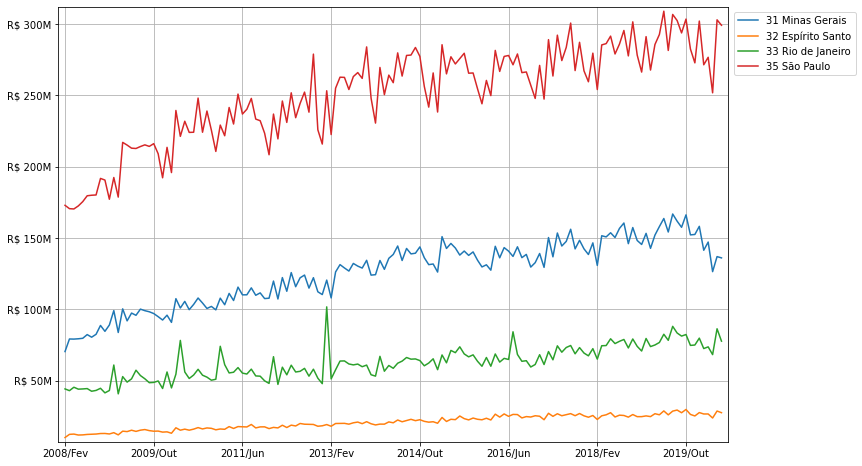

In [14]:
ax = usaveis_sudeste.loc[:,'2008/Fev': '2020/Jun'].T.plot(figsize=(12,8))

# Para Y axis
formattery = ticker.FuncFormatter(millions)
ax.yaxis.set_major_formatter(formattery)

plt.grid()
plt.margins(0.01)

ax.legend(bbox_to_anchor = (1.002, 1), loc="upper left")

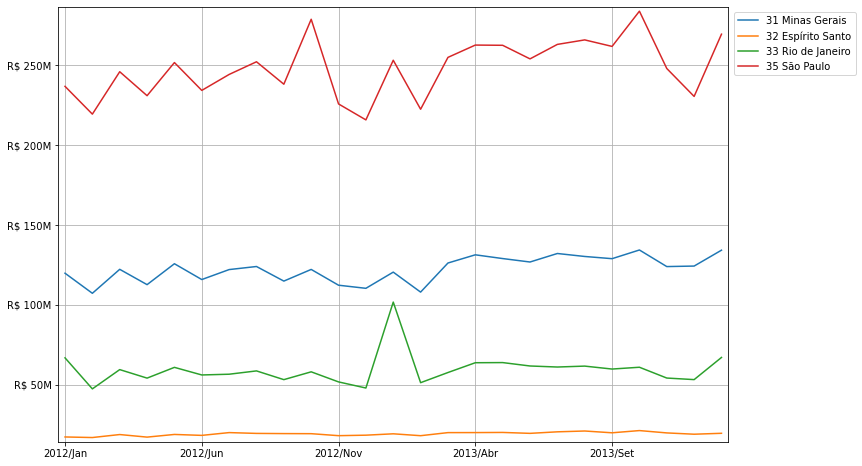

In [15]:
#Um 'zoom' no gráfico

ax = usaveis_sudeste.loc[:,'2012/Jan': '2014/Jan'].T.plot(figsize=(12,8))

# Para Y axis
formattery = ticker.FuncFormatter(millions)
ax.yaxis.set_major_formatter(formattery)

plt.grid()
plt.margins(0.01)

ax.legend(bbox_to_anchor = (1.002, 1), loc="upper left")

### DESAFIO: Adicionar seu estado escolhido novamente, deixe o gráfico informativo e tire conclusões sobre seus estados comparando com os demais. Tire suas conclusões e compartilhe com a gente.

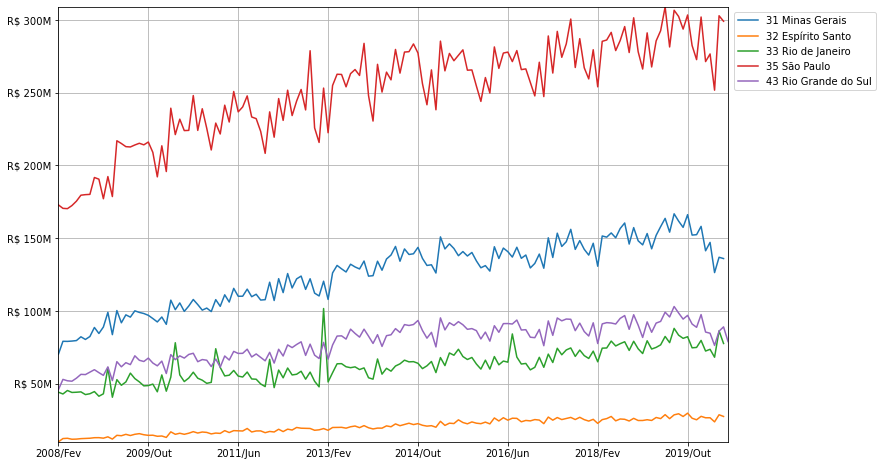

In [16]:
ax = usaveis_sudeste.loc[:,'2008/Fev': '2020/Jun'].T.plot(figsize=(12,8))
estado = "43 Rio Grande do Sul"
ax.plot(usaveis_ord_total.loc[estado,"2008/Fev":"2020/Jul"], label = estado)

# Para Y axis
formattery = ticker.FuncFormatter(millions)
ax.yaxis.set_major_formatter(formattery)

plt.grid()
plt.margins(0.0)

ax.legend(bbox_to_anchor = (1.002, 1), loc="upper left")